# PROJECT 19: PREDICT THE  COST OF RESTAURANT FOOD

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read train and test data
dftr =pd.read_excel('Data_Train.xlsx')
dfte=pd.read_excel('Data_Test.xlsx')

In [3]:
#lets check the shape of train and test data
print('train data = ',dftr.shape)
print('test data = ',dfte.shape)
#seems test data has one less column and it should be the fee column as it is the target

train data =  (12690, 9)
test data =  (4231, 8)


In [4]:
#Lets get more info of each column in train data
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


In [5]:
#Lets get more info of each column in test data
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB


In [6]:
#Lets check the first five rows of train data
dftr.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [7]:
#Lets check the first five rows of test data
dfte.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


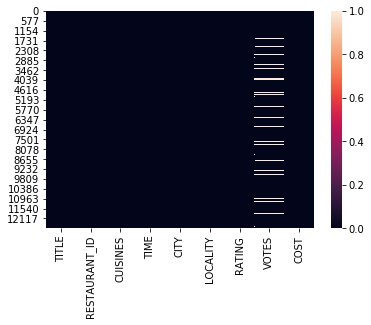

In [8]:
#Lets check the heatmap to see the missing values in train data
sns.heatmap(dftr.isnull())

In [9]:
#Lets check the null values in train data to explore more
dftr.isnull().sum()
#There are lots of missing values in  city and votes and few in  locality and rating

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

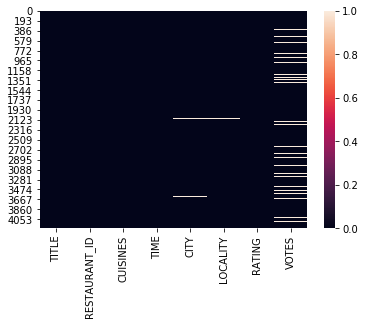

In [10]:
#Lets check the heatmap to see the missing values in test data
sns.heatmap(dfte.isnull())

In [11]:
#Lets see the missing values in test data to explore more
dfte.isnull().sum()
# same case as with training data missing values are there in city,locality,votes and rating

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [12]:
#Lets drop the duplicate rows if any
dftr.drop_duplicates(inplace=True)
dfte.drop_duplicates(inplace=True)

In [13]:
#lETS  PREPARE RATING COLUMN IN TRAINING DATA 
#WE Will substitute non numeric data with np.nan then later we will impute them

rates = list(dftr['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan
    
dftr['RATING']=rates


In [14]:
#lETS  PREPARE RATING COLUMN IN TEST DATA 

rates = list(dfte['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan
    
dfte['RATING']=rates

In [15]:
#Lets PREPARE VOTES COLUMN IN TRAIN DATA
votes = list(dftr['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 
dftr['VOTES']=votes

In [16]:
#Lets PREPARE VOTES COLUMN IN TEST DATA
votes = list(dfte['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 
dfte['VOTES']=votes

In [17]:
#Let us explore  numeric data in train set
dftr._get_numeric_data().head()

,RESTAURANT_ID,RATING,VOTES,COST
0,9438,3.6,49.0,1200
1,13198,4.2,30.0,1500
2,10915,3.8,221.0,800
3,6346,4.1,24.0,800
4,15387,3.8,165.0,300


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094A171F7F0>,
      dtype=object)

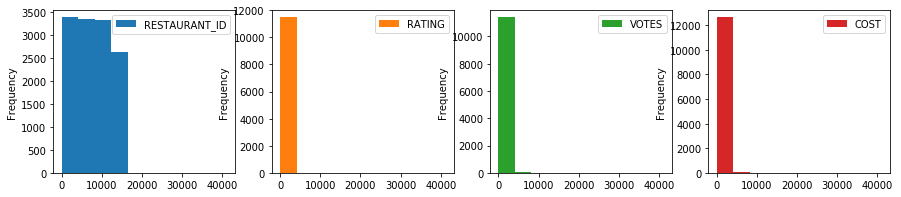

In [18]:
#Let us see the distribution of numeric data in train set

dftr._get_numeric_data().plot(kind='hist', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))
# we can see the skewness in the data that we  will deal soon

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094A140BC50>,
      dtype=object)

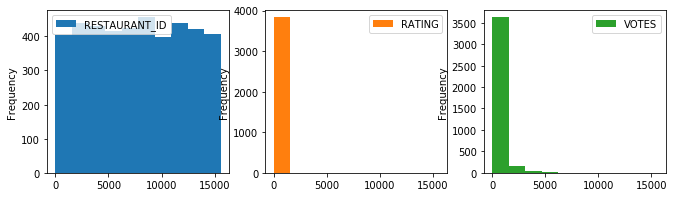

In [19]:
#Let us see the distribution of numeric data in test set

dfte._get_numeric_data().plot(kind='hist', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))
# we can see the skewness in the data that we  will deal soon

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094A171FB38>,
      dtype=object)

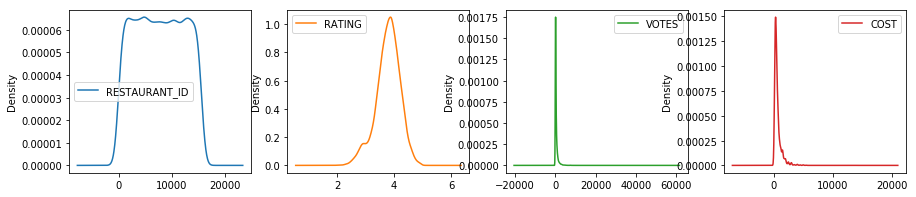

In [20]:
#Let us see the density plot of numeric data in train set
dftr._get_numeric_data().plot(kind='density', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000094A3097860>,
      dtype=object)

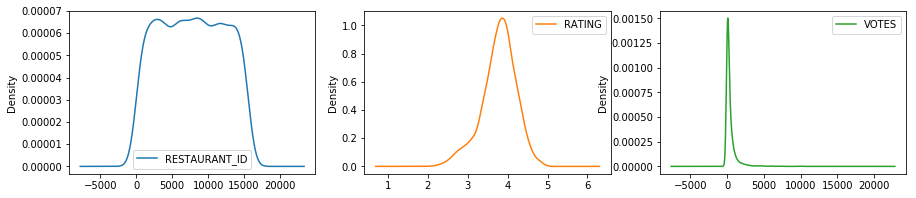

In [21]:
#Let us see the density plot of numeric data in test set
dfte._get_numeric_data().plot(kind='density', subplots=True, layout=(1,3), sharex=False, sharey=False, figsize=(15,3))

RESTAURANT_ID       AxesSubplot(0.125,0.125;0.168478x0.755)
RATING           AxesSubplot(0.327174,0.125;0.168478x0.755)
VOTES            AxesSubplot(0.529348,0.125;0.168478x0.755)
COST             AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

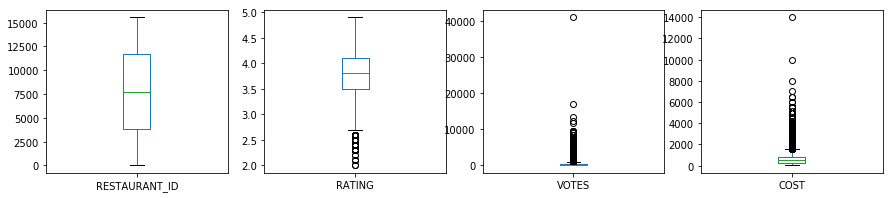

In [22]:
#Let us see the box plot of numeric data in train set

dftr._get_numeric_data().plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))
# we can see the presence of outliers which we will deal soon

RESTAURANT_ID       AxesSubplot(0.125,0.125;0.168478x0.755)
RATING           AxesSubplot(0.327174,0.125;0.168478x0.755)
VOTES            AxesSubplot(0.529348,0.125;0.168478x0.755)
dtype: object

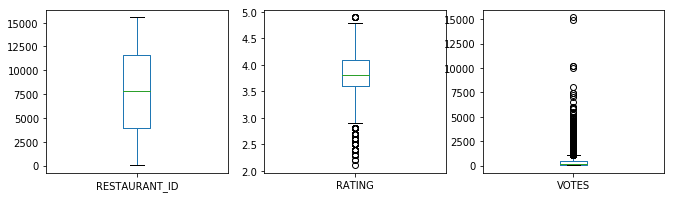

In [23]:
#Let us see the box plot of numeric data in test set

dfte._get_numeric_data().plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))
# we can see the presence of outliers which we will deal soon

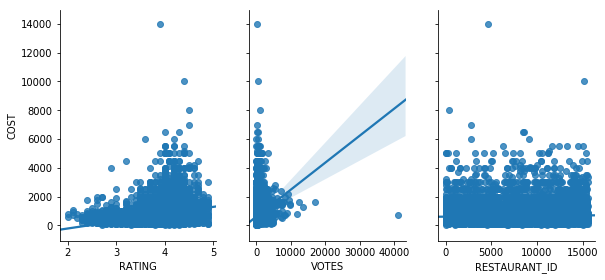

In [24]:
#lETS EXPLORE THE RELATION BETWEEN COST AND NUMERIC FEATURES OF TRAIN DATA

sns.pairplot(dftr, x_vars=['RATING', 'VOTES', 'RESTAURANT_ID'], size=4, aspect=0.7, y_vars='COST',kind='reg')

In [25]:
#We can see that as rating is increasing, cost is also increasing

In [26]:
#Lets see the correlation between numeric data OF TRAIN DATA
dftr.corr()

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.032848,-0.002605,0.041106
RATING,0.032848,1.000000,0.347993,0.326623
VOTES,-0.002605,0.347993,1.000000,0.245350
COST,0.041106,0.326623,0.245350,1.000000


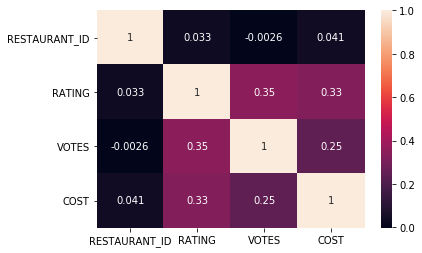

In [27]:
#Lets visualize the correlation with heatmap
sns.heatmap(dftr.corr(),annot=True)
#Among all numeric variables the cost has highest correlation with rating, then with votes and least with restaurant id

In [28]:
# Lets prepare city column in train data
cities = list(dftr['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip()

dftr['CITY'] = cities

In [29]:
# Lets prepare city column in test data
cities = list(dfte['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip()

dfte['CITY'] = cities

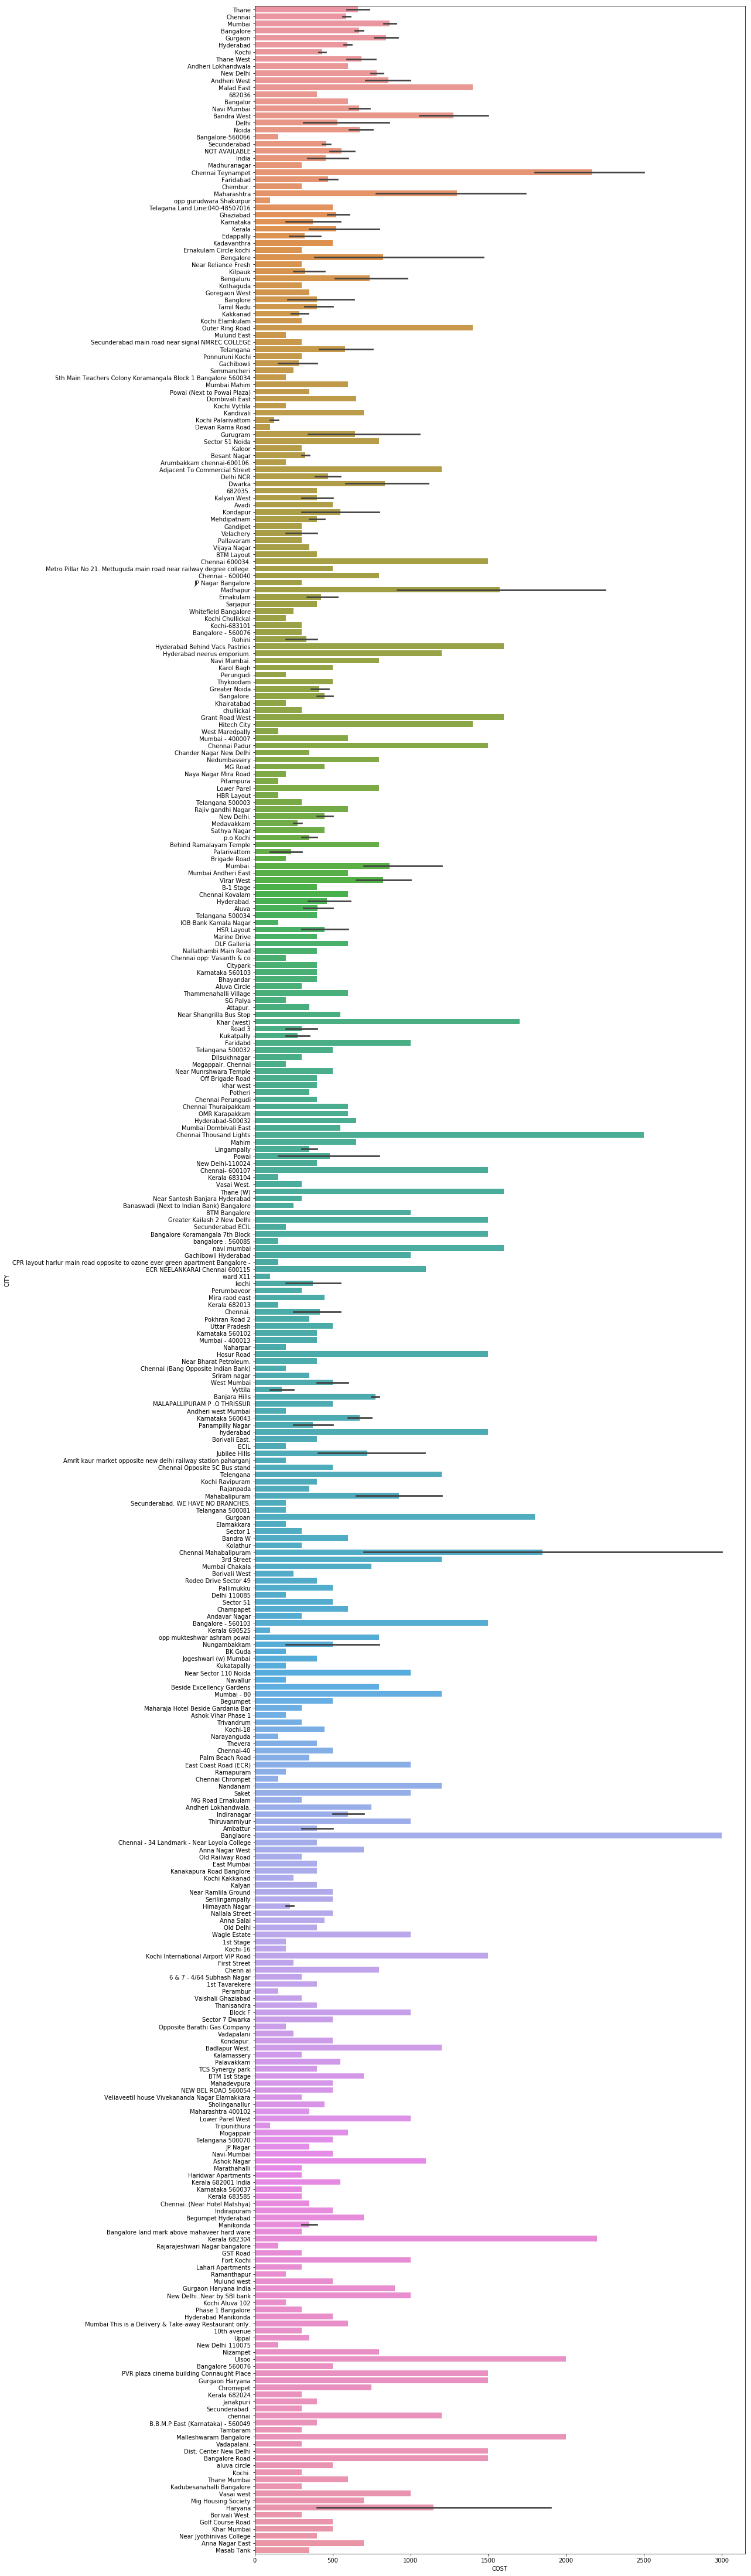

In [30]:
#Lets visualize the relation of cost with city
plt.figure(figsize=(15,80))
sns.barplot(x='COST',y='CITY',data=dftr)


In [31]:
# Lets prepare locality column in train data

localities = list(dftr['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip()  
dftr['LOCALITY']=localities

In [32]:
# Lets prepare locality column in test data

localities = list(dfte['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip()
dfte['LOCALITY']=localities

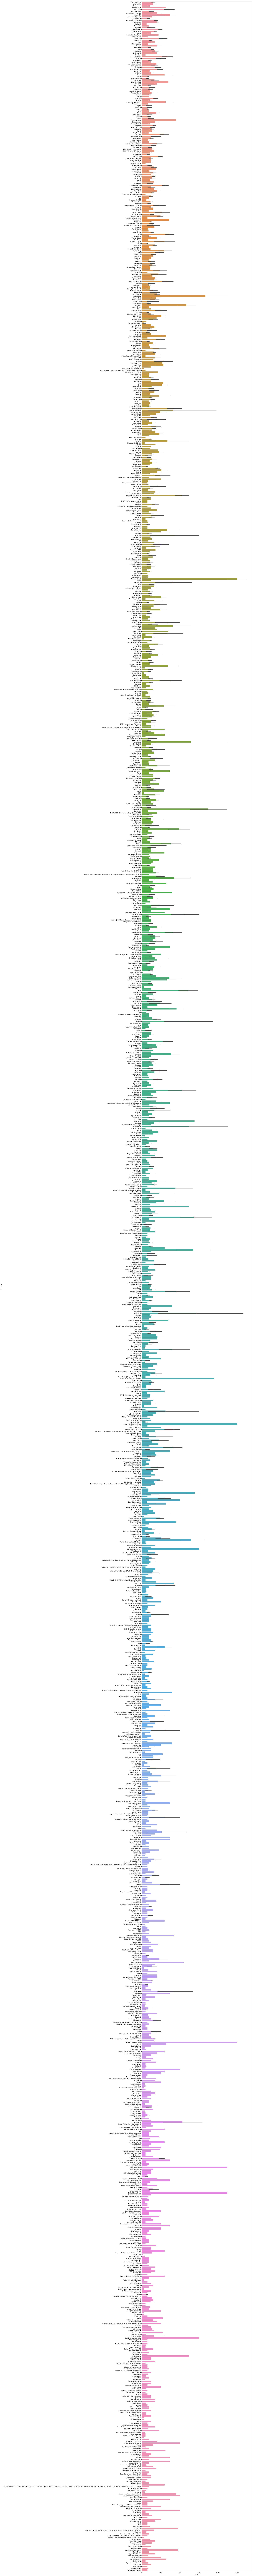

In [33]:
#Lets visualize the relation of cost with LOCALITY IN TRAIN DATA
plt.figure(figsize=(15,360))
sns.barplot(x='COST',y='LOCALITY',data=dftr)

In [34]:
# Lets analyse title column in train data

titles = list(dftr['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("Maximum Titles in a Cell : ", maxim) 

Maximum Titles in a Cell :  2


In [35]:
# Lets analyse title column in test data

titles = list(dfte['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("Maximum Titles in a Cell : ", maxim) 

Maximum Titles in a Cell :  2


In [36]:
#Lets extract info from title column in train data
titles = list(dftr['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip())
    try :
         T2.append(i.split(',')[1].strip())
    except :
         T2.append('NONE')
            
dftr['TITLE_1'] =T1
dftr['TITLE_2'] =T2

In [37]:
#Lets extract info from title column in test data
titles = list(dfte['TITLE'])

# Since Maximum number of titles in a cell is 2 will will split title in to 2 columns
T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip())
    try :
         T2.append(i.split(',')[1].strip())
    except :
         T2.append('NONE')
dfte['TITLE_1'] =T1
dfte['TITLE_2'] =T2

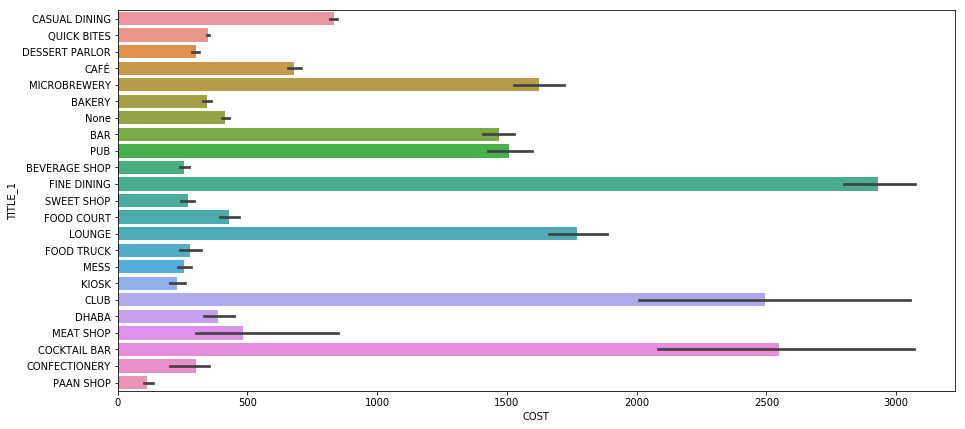

In [38]:
#lETS SEE THE RELATION BETWEEN TITLES AND COST IN TRAIN DATA
plt.figure(figsize=(15,7))
sns.barplot(x='COST',y='TITLE_1',data=dftr)

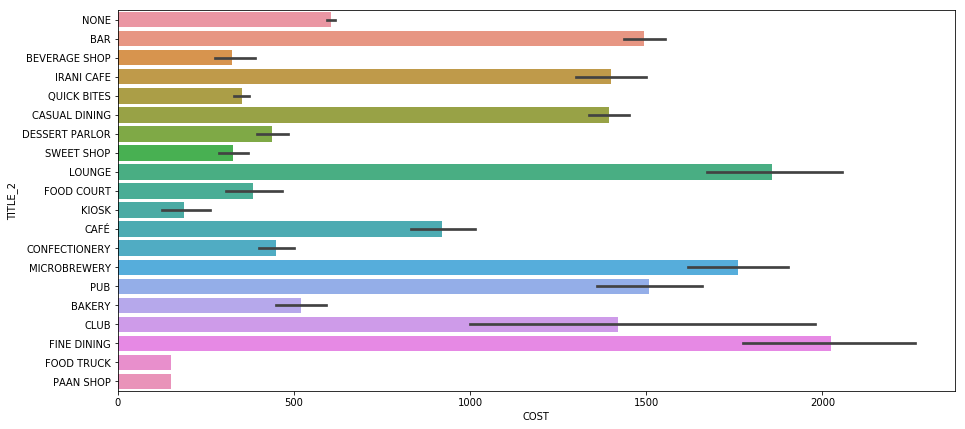

In [39]:
#Relation between cost and title_2
plt.figure(figsize=(15,7))
sns.barplot(x='COST',y='TITLE_2',data=dftr)

In [40]:
#Lets see the train data after processing done till now
dftr.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,NONE
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,NONE
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,NONE
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,NONE


In [41]:
#Lets see the test data after processing done till now
dfte.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,NONE
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,NONE
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,NONE
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,NONE
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,NONE


In [42]:
#Lets analyse CUISINES column in train data
cuisines = list(dftr['CUISINES'])
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("Maximum cuisines in a Cell : ", maxim)

Maximum cuisines in a Cell :  8


In [43]:
#Lets analyse CUISINES column in test data
cuisines = list(dfte['CUISINES'])
maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
print("Maximum cuisines in a Cell : ", maxim)

Maximum cuisines in a Cell :  8


In [44]:
#Lets extract more info from cusines IN TRAIN DATA
cuisines = list(dftr['CUISINES'])
   
# Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip())
        except :
            C8.append('NONE')
dftr['Cusine_1'] =C1
dftr['Cusine_2'] =C2
dftr['Cusine_3'] =C3
dftr['Cusine_4'] =C4
dftr['Cusine_5'] =C5
dftr['Cusine_6'] =C6
dftr['Cusine_7'] =C7
dftr['Cusine_8'] =C8

In [45]:
#Lets extract more info from cusines IN TEST DATA
cuisines = list(dfte['CUISINES'])
   
#Since Maximum number of cuisines in a cell is 8 will will split title in to 8 columns
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip())
        except :
            C8.append('NONE')
    
dfte['Cusine_1'] =C1
dfte['Cusine_2'] =C2
dfte['Cusine_3'] =C3
dfte['Cusine_4'] =C4
dfte['Cusine_5'] =C5
dfte['Cusine_6'] =C6
dfte['Cusine_7'] =C7
dfte['Cusine_8'] =C8

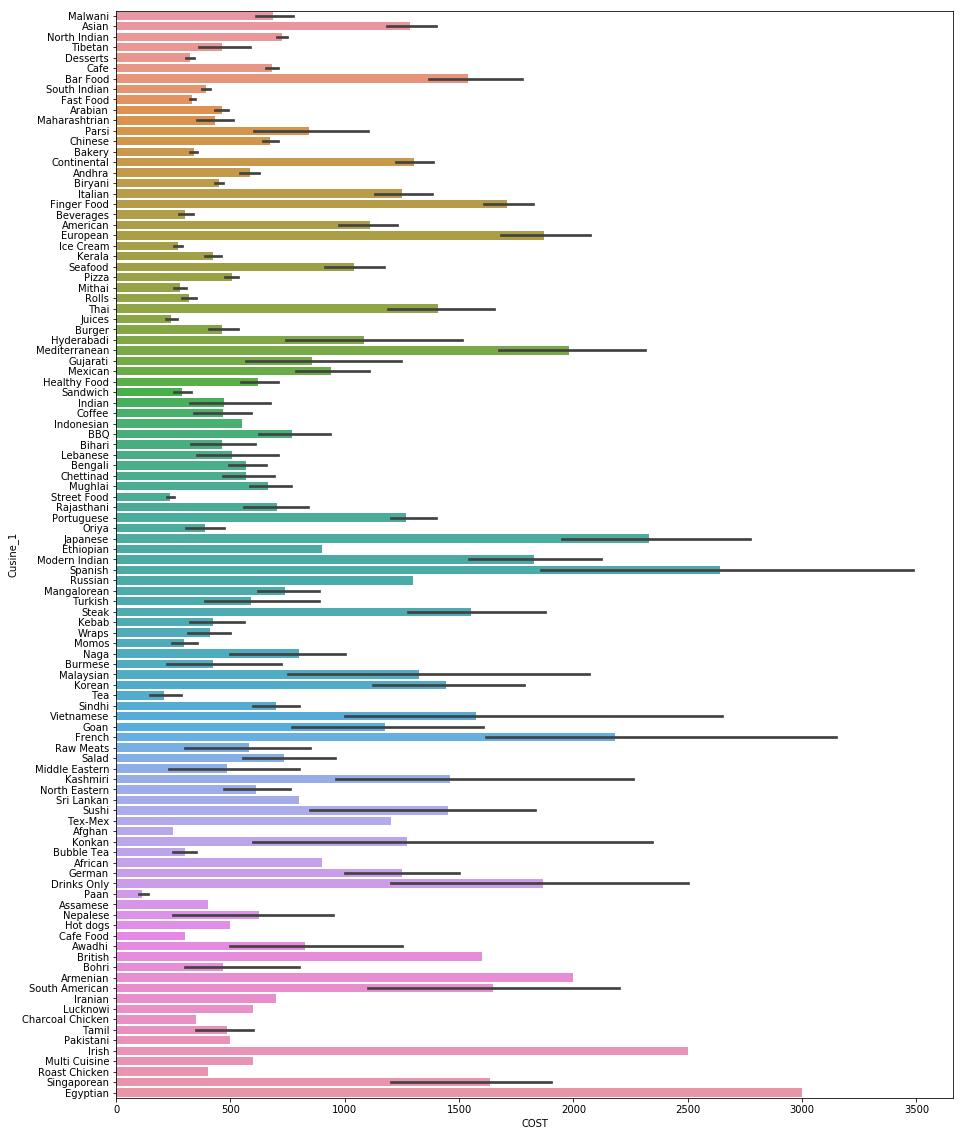

In [46]:
#Let us explore relation between cusine and cost
plt.figure(figsize=(15,20))
sns.barplot(x='COST',y='Cusine_1',data=dftr)

In [47]:
#Lets explore the train data
dftr.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,NONE,Malwani,Goan,North Indian,NONE,NONE,NONE,NONE,NONE
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NONE,NONE,NONE,NONE,NONE
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,NONE,NONE,NONE,NONE
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,NONE,Tibetan,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,NONE,Desserts,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [48]:
#Lets explore the test data
dfte.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564.0,CASUAL DINING,NONE,North Indian,Chinese,Mughlai,Kebab,NONE,NONE,NONE,NONE
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61.0,QUICK BITES,NONE,South Indian,Fast Food,Pizza,North Indian,NONE,NONE,NONE,NONE
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,NONE,North Indian,Seafood,Biryani,Chinese,NONE,NONE,NONE,NONE
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445.0,None,NONE,Biryani,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23.0,QUICK BITES,NONE,South Indian,Kerala,NONE,NONE,NONE,NONE,NONE,NONE


In [49]:
#Lets drop the Title ,Time and cusines column
dftr.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)
dfte.drop(['TITLE','CUISINES','TIME'],axis=1,inplace=True)

In [50]:
#Lets confirm the drop of mentioned columns in train data
dftr.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,9438,Thane,Dombivali East,3.6,49.0,1200,CASUAL DINING,NONE,Malwani,Goan,North Indian,NONE,NONE,NONE,NONE,NONE
1,13198,Chennai,Ramapuram,4.2,30.0,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NONE,NONE,NONE,NONE,NONE
2,10915,Chennai,Saligramam,3.8,221.0,800,CASUAL DINING,NONE,North Indian,Chinese,Biryani,Hyderabadi,NONE,NONE,NONE,NONE
3,6346,Mumbai,Bandra West,4.1,24.0,800,QUICK BITES,NONE,Tibetan,Chinese,NONE,NONE,NONE,NONE,NONE,NONE
4,15387,Mumbai,Lower Parel,3.8,165.0,300,DESSERT PARLOR,NONE,Desserts,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [51]:
#Lets confirm the drop of mentioned columns in test data
dfte.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,4085,Noida,Sector 18,4.3,564.0,CASUAL DINING,NONE,North Indian,Chinese,Mughlai,Kebab,NONE,NONE,NONE,NONE
1,12680,Mumbai,Grant Road,4.2,61.0,QUICK BITES,NONE,South Indian,Fast Food,Pizza,North Indian,NONE,NONE,NONE,NONE
2,1411,Mumbai,Marine Lines,3.8,350.0,CASUAL DINING,NONE,North Indian,Seafood,Biryani,Chinese,NONE,NONE,NONE,NONE
3,204,Faridabad,NIT,3.8,1445.0,None,NONE,Biryani,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,13453,Kochi,Kaloor,3.6,23.0,QUICK BITES,NONE,South Indian,Kerala,NONE,NONE,NONE,NONE,NONE,NONE


In [52]:
#the columns with text have already been dealed with proper substitution
#Lets deal with missing values in numeric data
dftr.fillna(0, inplace = True)
dfte.fillna(0,inplace=True)

In [53]:
#Lets check missing values in train data
dftr.isnull().sum()

RESTAURANT_ID    0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
TITLE_1          0
TITLE_2          0
Cusine_1         0
Cusine_2         0
Cusine_3         0
Cusine_4         0
Cusine_5         0
Cusine_6         0
Cusine_7         0
Cusine_8         0
dtype: int64

In [54]:
#Lets check missing values in test data
dfte.isnull().sum()

RESTAURANT_ID    0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
TITLE_1          0
TITLE_2          0
Cusine_1         0
Cusine_2         0
Cusine_3         0
Cusine_4         0
Cusine_5         0
Cusine_6         0
Cusine_7         0
Cusine_8         0
dtype: int64

RESTAURANT_ID       AxesSubplot(0.125,0.125;0.168478x0.755)
RATING           AxesSubplot(0.327174,0.125;0.168478x0.755)
VOTES            AxesSubplot(0.529348,0.125;0.168478x0.755)
COST             AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

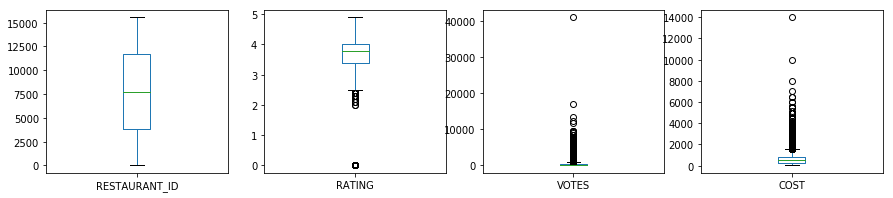

In [55]:
#Lets plot the box plot of numeric train data after dealing with missing values 
dftr._get_numeric_data().plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))

RESTAURANT_ID       AxesSubplot(0.125,0.125;0.168478x0.755)
RATING           AxesSubplot(0.327174,0.125;0.168478x0.755)
VOTES            AxesSubplot(0.529348,0.125;0.168478x0.755)
dtype: object

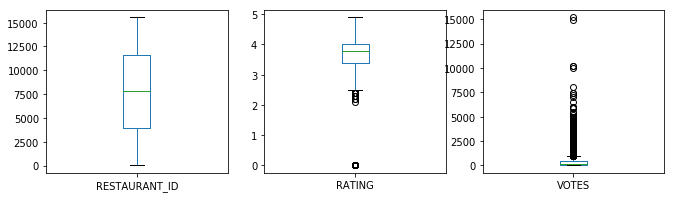

In [56]:
#Lets plot the box plot of numeric test data after dealing with missing values 
dfte._get_numeric_data().plot(kind='box', subplots=True, layout=(1,4), sharex=False, sharey=False, figsize=(15,3))

In [57]:
#Lets deal with categorical variables
# ideally we should dummy encoding for title columns and cusines columns as  individual enteries dont have any relation among themself
#But they too many unique values to be encoded, which will create so many new columns
# so we are using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
colm = ['TITLE_1','TITLE_2','Cusine_1','Cusine_2','Cusine_3','Cusine_4','Cusine_5','Cusine_6','Cusine_7','Cusine_8','CITY','LOCALITY']
for i in colm:
    dftr[i] = le.fit_transform(dftr[i])
    dfte[i] = le.fit_transform(dfte[i])

In [58]:
#Lets check the train data
dftr.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,COST,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,9438,321,285,3.6,49.0,1200,4,15,59,32,67,60,57,47,32,15
1,13198,67,1047,4.2,30.0,1500,4,1,6,60,41,60,57,47,32,15
2,10915,67,1102,3.8,221.0,800,4,15,72,23,12,32,57,47,32,15
3,6346,222,136,4.1,24.0,800,21,15,100,23,64,60,57,47,32,15
4,15387,222,620,3.8,165.0,300,8,15,28,63,64,60,57,47,32,15


In [59]:
#Lets check the test data
dfte.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,4085,111,663,4.3,564.0,5,13,60,19,56,33,42,30,25,6
1,12680,96,221,4.2,61.0,22,13,73,24,62,50,42,30,25,6
2,1411,96,411,3.8,350.0,5,13,60,70,13,15,42,30,25,6
3,204,41,456,3.8,1445.0,19,13,12,58,57,48,42,30,25,6
4,13453,78,300,3.6,23.0,22,13,73,42,57,48,42,30,25,6


In [60]:
#Lets check the skewness in data
dftr.skew()


RESTAURANT_ID     0.007317
CITY              0.237351
LOCALITY          0.335546
RATING           -2.215359
VOTES            14.518558
COST              3.978358
TITLE_1           0.087280
TITLE_2          -3.056280
Cusine_1          0.026650
Cusine_2         -0.074159
Cusine_3         -0.941027
Cusine_4         -2.279431
Cusine_5         -4.352337
Cusine_6         -7.342205
Cusine_7        -10.788171
Cusine_8        -14.006021
dtype: float64

In [61]:
#Lets reduce positive skewness in train data 
for col in dftr.columns:                                      
    if dftr.skew().loc[col]>0.55:
        dftr[col]=np.log1p(dftr[col])


In [62]:
#Lets check the skewness  again in train  data
dftr.skew()

RESTAURANT_ID     0.007317
CITY              0.237351
LOCALITY          0.335546
RATING           -2.215359
VOTES            -0.811598
COST              0.397407
TITLE_1           0.087280
TITLE_2          -3.056280
Cusine_1          0.026650
Cusine_2         -0.074159
Cusine_3         -0.941027
Cusine_4         -2.279431
Cusine_5         -4.352337
Cusine_6         -7.342205
Cusine_7        -10.788171
Cusine_8        -14.006021
dtype: float64

In [63]:
#Lets reduce negative skewness in train data
for col in dftr.columns:                                      
    if dftr.skew().loc[col]<-0.55:
        dftr[col]=np.power(dftr[col],2)


In [64]:
#Lets check the skewness in  test data
dfte.skew()

RESTAURANT_ID     0.007058
CITY              0.068810
LOCALITY          0.300192
RATING           -2.189835
VOTES             7.049691
TITLE_1           0.078140
TITLE_2          -3.239004
Cusine_1         -0.047244
Cusine_2         -0.131918
Cusine_3         -1.054655
Cusine_4         -2.267248
Cusine_5         -4.370405
Cusine_6         -7.070736
Cusine_7         -9.475386
Cusine_8        -12.257338
dtype: float64

In [65]:
#Lets reduce positive skewness in test data 
for col in dfte.columns:                                      
    if dfte.skew().loc[col]>0.55:
        dfte[col]=np.log1p(dfte[col])

In [66]:
#Lets check the skewness again
dfte.skew()

RESTAURANT_ID     0.007058
CITY              0.068810
LOCALITY          0.300192
RATING           -2.189835
VOTES            -0.812615
TITLE_1           0.078140
TITLE_2          -3.239004
Cusine_1         -0.047244
Cusine_2         -0.131918
Cusine_3         -1.054655
Cusine_4         -2.267248
Cusine_5         -4.370405
Cusine_6         -7.070736
Cusine_7         -9.475386
Cusine_8        -12.257338
dtype: float64

In [67]:
#Lets reduce negative skewness in test data
for col in dfte.columns:                                      
    if dfte.skew().loc[col]<-0.55:
        dfte[col]=np.power(dfte[col],2)


In [68]:
#Lets check the skewness again
dfte.skew()

RESTAURANT_ID     0.007058
CITY              0.068810
LOCALITY          0.300192
RATING           -1.261801
VOTES             0.426305
TITLE_1           0.078140
TITLE_2          -2.828006
Cusine_1         -0.047244
Cusine_2         -0.131918
Cusine_3         -0.621323
Cusine_4         -1.555286
Cusine_5         -3.494139
Cusine_6         -5.015292
Cusine_7         -7.562924
Cusine_8        -11.926993
dtype: float64

In [69]:
# Lets remove the outliers if any
from scipy.stats import zscore
colm=dftr[['RATING','VOTES','COST','RESTAURANT_ID']]
z_score =abs(zscore(colm))
#z_score =abs(zscore(dftr))
dfx = dftr.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', dftr.shape)
print('The shape of dataframe after removing outliers is =', dfx.shape)
# There were few outliers which have been removed

The shape of original dataframe was = (12665, 16)
The shape of dataframe after removing outliers is = (12572, 16)


In [70]:
#Now lets seperate features and target
xtrain=dfx.drop('COST',axis=1)
ytrain=dfx[['COST']]

In [71]:
#Lets see the first five rows of features
xtrain.head()

,RESTAURANT_ID,CITY,LOCALITY,RATING,VOTES,TITLE_1,TITLE_2,Cusine_1,Cusine_2,Cusine_3,Cusine_4,Cusine_5,Cusine_6,Cusine_7,Cusine_8
0,9438,321,285,12.96,15.303924,4,225,59,32,4489,3600,3249,2209,1024,225
1,13198,67,1047,17.64,11.792268,4,1,6,60,1681,3600,3249,2209,1024,225
2,10915,67,1102,14.44,29.188923,4,225,72,23,144,1024,3249,2209,1024,225
3,6346,222,136,16.81,10.361162,21,225,100,23,4096,3600,3249,2209,1024,225
4,15387,222,620,14.44,26.132419,8,225,28,63,4096,3600,3249,2209,1024,225


In [72]:
#Lets see the first five rows of target
ytrain.head()

,COST
0,7.090910
1,7.313887
2,6.685861
3,6.685861
4,5.707110


In [73]:
#Lets import the algorithims/models to be evaluated  AND OTHER REQUIRED LIBRARIES
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [74]:
# Lets import standard scaler as distance based algorithim require data to be in same scale
from sklearn.preprocessing import StandardScaler
# Lets create a list of models to be evaluated ALONG with pipeline
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('Scaler', StandardScaler()),('Lasso',Lasso(random_state=5))])))
pipelines.append(('Ridge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge(random_state=5))])))
pipelines.append(('EN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(random_state=5))])))
pipelines.append(('DT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor(random_state=5))])))
pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

In [75]:
#Let us check which model will perform well on the given data on the basis of mean crossval score(neg_mean_squared_error) and its std dev
results1 = []
names1 = []
for name, model in pipelines: 
    kfold1 = KFold(n_splits=10, random_state=1) 
    cv_results1 = cross_val_score(model, xtrain, ytrain, cv=kfold1, scoring='neg_mean_squared_error') 
    results1.append(cv_results1.mean()) 
    names1.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results1.mean(), cv_results1.std())
    print(msg)

LR: -0.317290 (0.008396)
Lasso: -0.496441 (0.017509)
Ridge: -0.317290 (0.008396)
EN: -0.496441 (0.017509)
DT: -0.297979 (0.007302)
SVR: -0.260524 (0.009052)
KNN: -0.289192 (0.012323)


In [76]:
#Let us check which model will perform well on the given data on the basis of mean crossval r2score and its std dev
results = []
names = []
for name, model in pipelines: 
    kfold = KFold(n_splits=10, random_state=1) 
    cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='r2') 
    results.append(cv_results.mean()) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.359807 (0.019919)
Lasso: -0.000904 (0.001064)
Ridge: 0.359807 (0.019917)
EN: -0.000904 (0.001064)
DT: 0.398338 (0.028723)
SVR: 0.474579 (0.012500)
KNN: 0.416492 (0.027040)


In [77]:
#Lets create a comparison
Comparison = pd.DataFrame({'ModelName':names,'R2_score': results,'NMSE':results1})
Comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
5,SVR,0.474579,-0.260524
6,KNN,0.416492,-0.289192
4,DT,0.398338,-0.297979
2,Ridge,0.359807,-0.317290
0,LR,0.359807,-0.317290
1,Lasso,-0.000904,-0.496441
3,EN,-0.000904,-0.496441


In [78]:
#Lets see if ensemble technique can perform better
#lETS CREATE PIPLELINE FOR ENSEMBLE TECHNIQUE
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
pipelines1 = []
pipelines1.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(random_state=5))])))
pipelines1.append(('ADC', Pipeline([('Scaler', StandardScaler()),('ADC', AdaBoostRegressor(random_state=5))])))
pipelines1.append(('GBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingRegressor(random_state=5))])))

In [79]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of NMSE

results2 = []
names2 = []
for name, model in pipelines1: 
    kfold2 = KFold(n_splits=10, random_state=1) 
    cv_results2 = cross_val_score(model, xtrain, ytrain, cv=kfold2, scoring='neg_mean_squared_error') 
    results2.append(cv_results2.mean()) 
    names2.append(name) 
    msg2 = "%s: %f (%f)" % (name, cv_results2.mean(), cv_results2.std())
    print(msg2)

RF: -0.161485 (0.006818)
ADC: -0.275290 (0.009339)
GBC: -0.163261 (0.005520)


In [80]:
#lets  see  the performance if any of the three chosen ensemble technique  with default paramters can perform better in terms of r2 score
results3 = []
names3 = []
for name, model in pipelines1: 
    kfold3 = KFold(n_splits=10, random_state=1) 
    cv_results3 = cross_val_score(model, xtrain, ytrain, cv=kfold3, scoring='r2') 
    results3.append(cv_results3.mean()) 
    names3.append(name) 
    msg3 = "%s: %f (%f)" % (name, cv_results3.mean(), cv_results3.std())
    print(msg3) 

RF: 0.674106 (0.015895)
ADC: 0.444795 (0.012905)
GBC: 0.670643 (0.010794)


In [81]:
#Lets see the comparison between ensemble techniques
Comparison2 = pd.DataFrame({'ModelName':names2,'R2_score': results3,'NMSE':results2})
Comparison2.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
0,RF,0.674106,-0.161485
2,GBC,0.670643,-0.163261
1,ADC,0.444795,-0.275290


In [82]:
#Lets see the comparison between all the basic and ensemble techniques
final_comparison =pd.concat([Comparison,Comparison2])
final_comparison.sort_values(by='R2_score', ascending=False)

,ModelName,R2_score,NMSE
0,RF,0.674106,-0.161485
2,GBC,0.670643,-0.163261
5,SVR,0.474579,-0.260524
1,ADC,0.444795,-0.275290
6,KNN,0.416492,-0.289192
4,DT,0.398338,-0.297979
2,Ridge,0.359807,-0.317290
0,LR,0.359807,-0.317290
1,Lasso,-0.000904,-0.496441
3,EN,-0.000904,-0.496441


In [83]:
#Lets create kfold
kfoldx = KFold(n_splits=10, random_state=1)

In [84]:
#Lets try to check if  cross val performance of GBR can be increased by tuning parameters
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(xtrain)
scXtrain = scaler.transform(xtrain)

param_grid = {'n_estimators': [50,100,200,300,400],'learning_rate': [0.05,0.1,0.2],'max_depth': [2,3,4],'min_samples_split': [2,3,4], 'min_samples_leaf':[1,2]}
mod = GradientBoostingRegressor(random_state=5)
grid = GridSearchCV(estimator=mod, param_grid=param_grid, scoring='r2', cv=kfoldx,n_jobs=-1,verbose=True)
grid_result = grid.fit(scXtrain, ytrain)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 45.0min finished


In [85]:
#Lets see the best score
grid_result.best_score_
# we can see the r2 score has been improved from 0.672 to 0.729

0.7282214628919249

In [86]:
#Lets see the best parameters
grid_result.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 400}

In [87]:
#Lets see the best estimator
grid_result.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=2,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=5, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
# lETS CHECK ITS KFOLD CROSS VAL NMSE AND R2 SCORE
modelf=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=4, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=2,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=400, n_iter_no_change=None, presort='auto',random_state=5, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)

print('KFOLD Cross val nmse = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="neg_mean_squared_error").mean())
print('KFOLD Cross val R2 = ',cross_val_score(modelf,scXtrain,ytrain,cv=kfoldx,scoring="r2").mean())

KFOLD Cross val nmse =  -0.13469916243607075
KFOLD Cross val R2 =  0.7282225656362108


In [89]:
#Lets implement the model using best parameters
GBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', max_depth=4, max_features=None,max_leaf_nodes=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=2,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=400, n_iter_no_change=None, presort='auto',random_state=5, subsample=1.0, tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)
sc = StandardScaler()
X_train= sc.fit_transform(xtrain)
X_test= sc.transform(dfte)
GBR.fit(X_train,ytrain)
ypred=GBR.predict(X_test)


In [90]:
#As we have taken the log1p of fee colum to reduce skewness, we have to reverse the operation to get actual predicted values
ypredx=np.expm1(ypred)

In [91]:
# Lets save the predicted result to a excel file
dfpr = pd.DataFrame(ypredx,columns=['COST'])
dfpr.to_csv('GBR_COST_prediction.csv')

In [92]:
# Lets dump our model into pkl file
from sklearn.externals import joblib
joblib.dump(GBR,'GBR_COST_PRED.pkl')

['GBR_COST_PRED.pkl']